# Histograms

Histograms are plots that illustrate the empirical distribution of numeric data. They allow observations of where data values locate and how frequent they are.

Below is an example of a histogram. Here, the horizontal axis represents the values (or value bins) in data, and the vertical axis their frequency. For instance, there are about four values between 8 and 9, 9 between 9 and 11, 75 between 13 and 15, and so on.

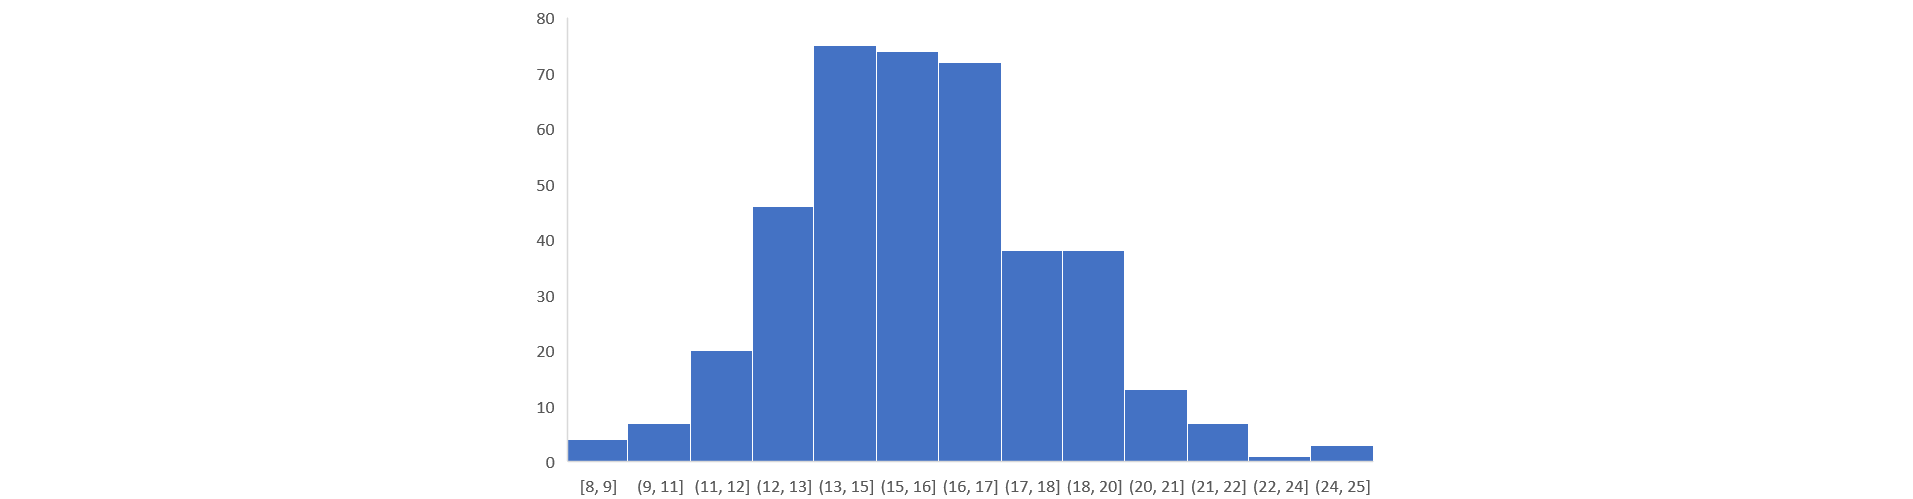

# Demonstration

## Load data

We will use the `auto-mpg` data. The original version is at https://archive.ics.uci.edu/ml/datasets/auto+mpg. However, I did some minor modifications so we can focus on visualizing without having to worry about processing data.

In [1]:
import pandas as pd

data = pd.read_csv('auto-mpg.csv')
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,North America,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,North America,buick skylark 320


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Basic histograms

### With matplotlib
We use `pyplot.hist()` to draw a histogram for a single numeric array. At minimum, the input is the array of interests.

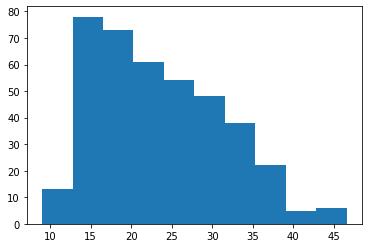

In [3]:
import matplotlib.pyplot as plt

plt.hist(data['mpg'])
plt.show()

We can add other options to customize
- figure size
- bins: number of groups of values, equal to the number of bars in the histogram
- histogram color
- title
- horizontal axis name
- vertical axis name

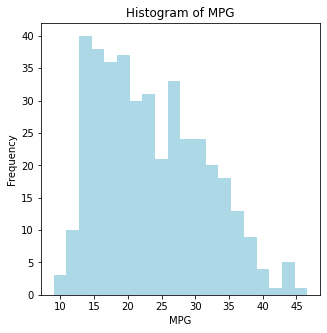

In [4]:
plt.figure(figsize=(5,5))
plt.hist(data['mpg'], bins=20, color='lightblue')
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

### With pandas

From a single pandas series, we can call `plot.hist()` to draw a histogram for the column

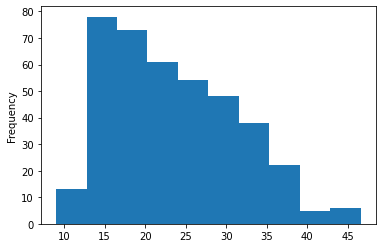

In [5]:
data['mpg'].plot.hist()
plt.show()

Like matplotlib, we can add options like bins, figure size, title, etc. to the `hist()` function. Note that some options like `xlabel` still needs to be set from pyplot.

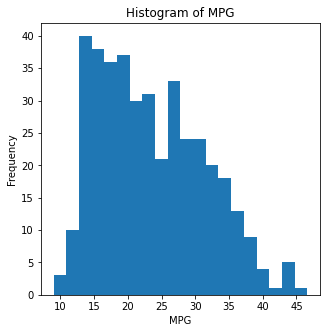

In [6]:
data['mpg'].plot.hist(bins=20, figsize=(5,5), title='Histogram of MPG')
plt.xlabel('MPG')
plt.show()

### Using seaborn

In seaborn, we use `histplot()` to draw histograms. Options like `figsize` or setting `title` still come from pyplot.

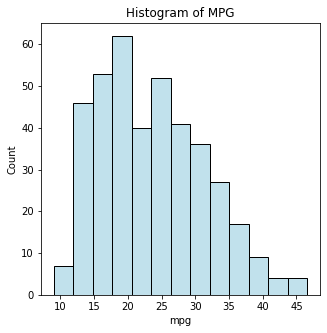

In [7]:
import seaborn as sn

plt.figure(figsize=(5,5))
sn.histplot(data['mpg'], color='lightblue')
plt.title('Histogram of MPG')
plt.show()

## Advance concepts in histograms

### Adding a normal curve

Histograms alone just illustrate value bins in data and their frequency. Sometimes, it could be useful to compare the histogram to a normal distribution of the same mean and standard deviation to verify the data normality. In such cases, we can superimpose a normal curve on the histogram like below.

We utilize the `norm` object from `scipy.stats` to estimate the normal distribution from the column 

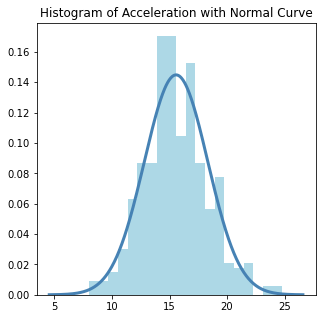

In [8]:
import numpy as np
from scipy.stats import norm

#extract the column of interests
column = 'acceleration'

#plot the histogram
plt.figure(figsize=(5,5))
plt.hist(data[column], bins=20, density=True, color='lightblue')
  
#estimate mean and standard deviation of overlaid normal distribution
mu, std = norm.fit(data[column]) 
#generate points for the curve
x = np.linspace(mu-4*std, mu+4*std, 500)
y_norm = norm.pdf(x, mu, std)

#plot the normal line  
plt.plot(x, y_norm, 'steelblue', linewidth=3)

#other options
plt.title('Histogram of Acceleration with Normal Curve')
plt.show()

### Adding density curve

A density line is similar to a smoothed version of the histogram outline. It is useful in visualize a more generalized distribution of the data instead of the exact one. We can use `gaussian_kde` from scipy to estimate this curve

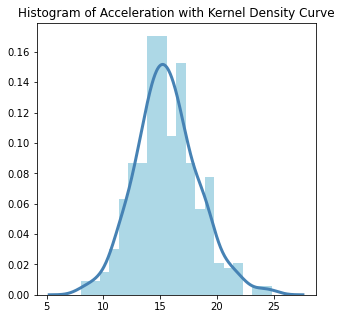

In [9]:
import numpy as np
from scipy.stats import gaussian_kde

#extract the column of interests
column = 'acceleration'

#plot the histogram
plt.figure(figsize=(5,5))
plt.hist(data[column], bins=20, density=True, color='lightblue')

#estimate kernel density
kde = gaussian_kde(data[column]) 
#generate points of the curve
x = np.linspace(data[column].min()-data[column].std(), data[column].max()+data[column].std(), 500)
y_kde = kde(x)
#plot the density line
plt.plot(x, y_kde, 'steelblue', linewidth=3)
  
#other options
plt.title('Histogram of Acceleration with Kernel Density Curve')
plt.show()

### Overlay both curves

We can overlay both the normal and density curves on the same histogram to see how close the data distribution is to normality. This is just a combination of the previous codes

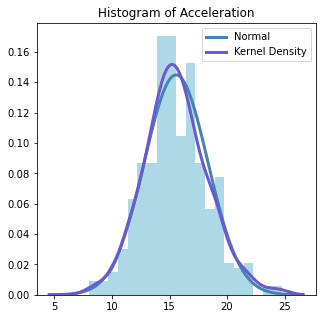

In [10]:
#extract the column of interests
column = 'acceleration'

#estimate mean and standard deviation of normal distribution
mu, std = norm.fit(data[column]) 
#estimate kernel density
kde = gaussian_kde(data[column]) 

#plot the histogram
plt.figure(figsize=(5,5))
plt.hist(data[column], bins=20, density=True, color='lightblue')

#estimate points in the curve
x = np.linspace(mu-4*std, mu+4*std, 200)
y_norm = norm.pdf(x, mu, std)
y_kde = kde(x)

# Plot the normal line  
plt.plot(x, y_norm, 'steelblue', linewidth=3)
# Plot the density line
plt.plot(x, y_kde, 'slateblue', linewidth=3)

#other options
plt.legend(['Normal','Kernel Density'])
plt.title('Histogram of Acceleration')
plt.show()

#### Using pandas

In pandas, we can combine `plot.hist()` and `plot.density()` to overlay a density line on the histogram. However, if you also want a normal line, you still need to manually draw it with scipy `norm` like previously.

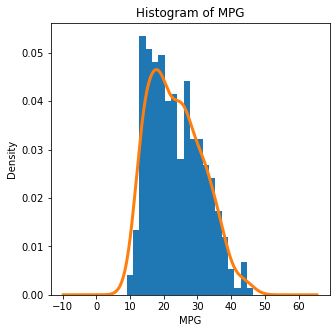

In [11]:
column = 'mpg'
data[column].plot.hist(bins=20, density=True, figsize=(5,5), title='Histogram of MPG')
data[column].plot.density(linewidth=3)
plt.xlabel('MPG')
plt.show()

#### Using Seaborn

With seaborn, simply add `kde=True` to `histplot()` to add a density curve. Changing the attributes of the density line is a bit more complicated as we have to pass those through the `line_kws` argument.

However, like pandas, we have to manually draw the normal curve if wanted

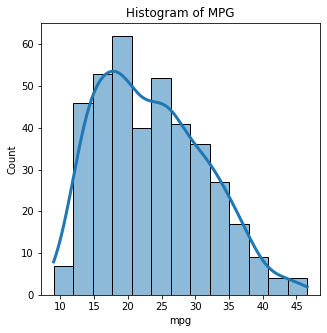

In [12]:
plt.figure(figsize=(5,5))
sn.histplot(data['mpg'], kde=True, line_kws={'color':'steelblue','lw':3}).set(title='Histogram of MPG')
plt.show()

## Multiple histogram

### Stratified histogram

We can draw histograms of a column stratified by a group column. This means that we have one histogram for data belonging to each class of the stratifying column superimposed in one figure. The purpose of this type of plot is usually to illustrate whether the data distribution varies by classes.

We can write a loop to extract data for each class and draw their histograms. Legends and line histograms can further be added for presentation purpose.

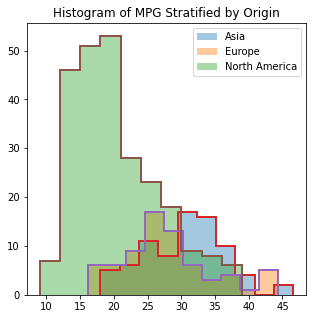

In [13]:
column = 'mpg'
strat_column = 'origin'
title = 'Histogram of MPG Stratified by Origin'

#draw filled histograms
plt.figure(figsize=(5,5))
for cat in np.unique(data[strat_column]):
    plt.hist(data[column][data[strat_column]==cat], alpha=0.4)
#add legends
plt.legend(np.unique(data[strat_column]))
#draw line histograms to add borders
for cat in np.unique(data[strat_column]):
    plt.hist(data[column][data[strat_column]==cat], histtype='step', linewidth=2)
plt.title(title)
plt.show()

### Stratified density plots

Stacking histogram, regardless of styles, can get chaotic very fast as the number of classes increases. For more than two or three distributions, we may want to simplify the histograms into density curves so they are easier to look at.

Similar to draw histograms, we can write a loop to subset the data by the stratifying column and draw density curves for each of them.

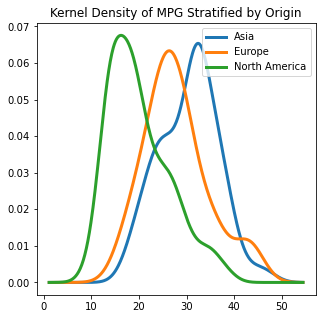

In [14]:
column = 'mpg'
strat_column = 'origin'
title = 'Kernel Density of MPG Stratified by Origin'

#get x-coordinate of the curves
x = np.linspace(data[column].min()-data[column].std(), data[column].max()+data[column].std(), 500)

plt.figure(figsize=(5,5))
#loop through each stratifying class
for cat in np.unique(data[strat_column]):
    kde = gaussian_kde(data[column][data[strat_column]==cat]) 
    y_kde = kde(x)
    plt.plot(x, y_kde, linewidth=3)
    
plt.legend(np.unique(data[strat_column]))
plt.title(title)
plt.show()

Compared to the stacked histograms, we can see that the density curves no longer show the difference in frequencies among the three distributions. This is because they are probabilities calculated individually for each stratifying class.

We can manually scale the density curves by their class frequency as follows. Note that both types of plots are correct and should be selected based on the purpose of visualization.

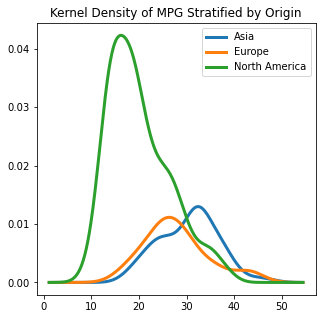

In [15]:
column = 'mpg'
strat_column = 'origin'
title = 'Kernel Density of MPG Stratified by Origin'

#get x-coordinate of the curves
x = np.linspace(data[column].min()-data[column].std(), data[column].max()+data[column].std(), 500)

plt.figure(figsize=(5,5))
#loop through each stratifying class
for cat in np.unique(data[strat_column]):
    #estimate kernel density
    kde = gaussian_kde(data[column][data[strat_column]==cat]) 
    y_kde = kde(x) * len(data[data[strat_column]==cat])/len(data) #scale density to the proportion of the class
    plt.plot(x, y_kde, linewidth=3)
    
plt.legend(np.unique(data[strat_column]))
plt.title(title)
plt.show()

#### Using seaborn

The unscaled density plot can be quickly drawn in seaborn. We still use either histplot or kdeplot and simply set the stratifying column with `hue=` option. The density plot will be automatically scaled

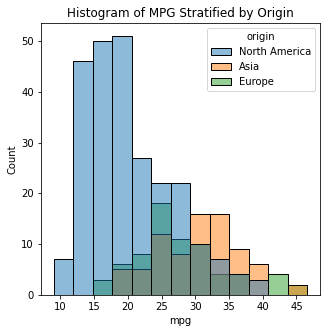

In [16]:
column = 'mpg'
strat_column = 'origin'
title = 'Histogram of MPG Stratified by Origin'

plt.figure(figsize=(5,5))
sn.histplot(data=data, x=column, hue=strat_column, alpha=0.5)
plt.title(title)
plt.show()

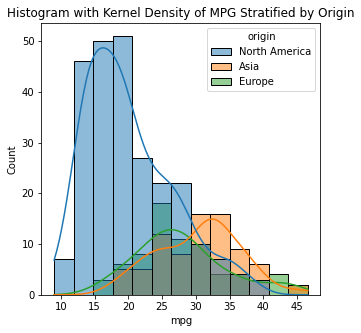

In [17]:
column = 'mpg'
strat_column = 'origin'
title = 'Histogram with Kernel Density of MPG Stratified by Origin'

plt.figure(figsize=(5,5))
sn.histplot(data=data, x=column, hue=strat_column, kde=True)
plt.title(title)
plt.show()

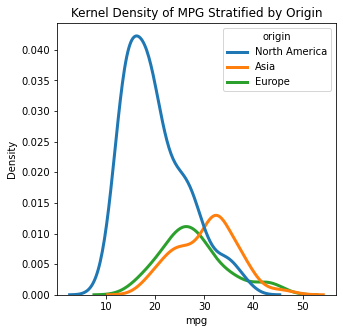

In [18]:
column = 'mpg'
strat_column = 'origin'
title = 'Kernel Density of MPG Stratified by Origin'

plt.figure(figsize=(5,5))
sn.kdeplot(data=data, x=column, hue=strat_column, linewidth=3)
plt.title(title)
plt.show()

### Multivariate Histograms

Finally, we can draw histograms or density plots for multiple columns to compare their distributions. 

Providing the complete DataFrame (sliced to numeric columns only) to `pyplot.hist()` will result in a stacked histogram, however, the column histograms are not superimposed but placed next to each other. Without scaling, this type of histogram is fairly bad.

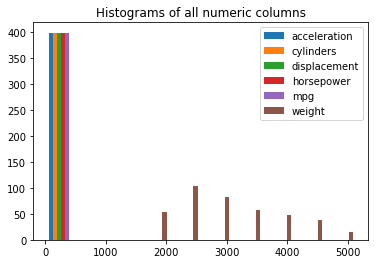

In [19]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

plt.hist(data[num_cols])
plt.legend(num_cols)
plt.title('Histograms of all numeric columns')
plt.show()

We can manually scale the data, for example, standardization. The histogram becomes much better, however, still quite difficult to read

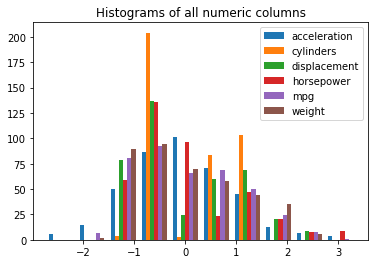

In [20]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

data_scaled = (data[num_cols] - data[num_cols].mean())/data[num_cols].std()
plt.hist(data_scaled)
plt.legend(num_cols)
plt.title('Histograms of all numeric columns')
plt.show()

#### In pandas

In my opinion, the clearest way is to draw side-by-side histograms with pandas. Simply call `hist()` from the DataFrame, all numeric columns will have a histogram drawn

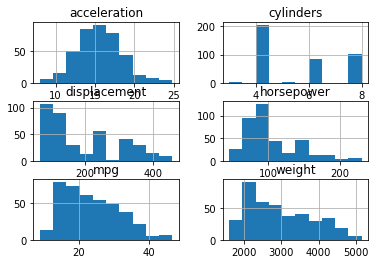

In [21]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

data[num_cols].hist()
plt.show()

Like before, options like `bins`, `figsize`, `color`, etc. can be added to `hist()` to improve presentation

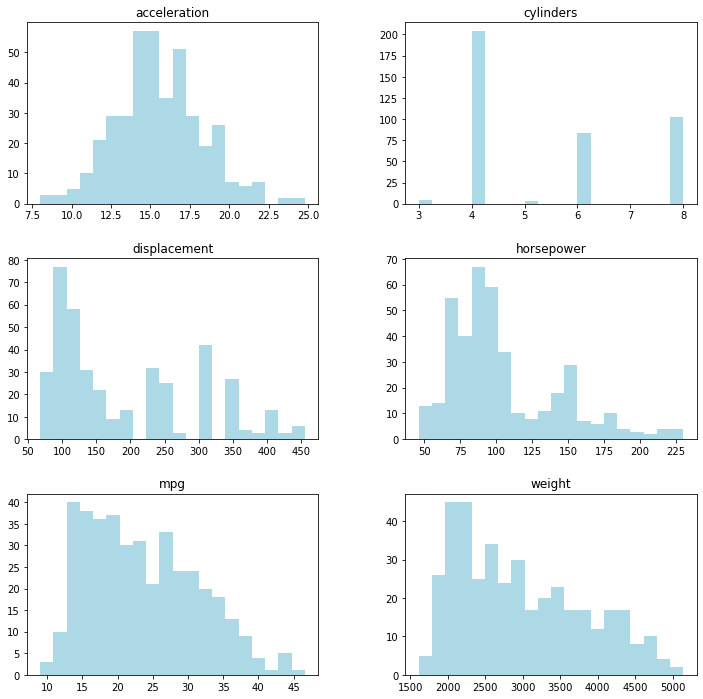

In [22]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

data[num_cols].hist(bins=20, figsize=(12,12), color='lightblue', grid=False)
plt.show()

#### With seaborn

With seaborn, the histogram will be superimposed. Like matplotlib, unscaled data will lead to pretty bad histograms.

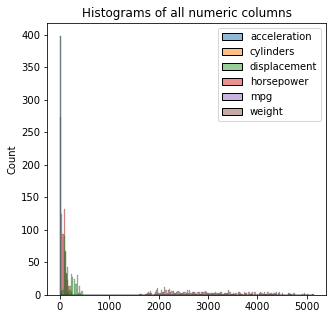

In [23]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

plt.figure(figsize=(5,5))
sn.histplot(data[num_cols])
plt.title('Histograms of all numeric columns')
plt.show()

Scaling makes it a bit better, however, still very difficult to read with too many columns. Instead, we may want to superimpose density curves.

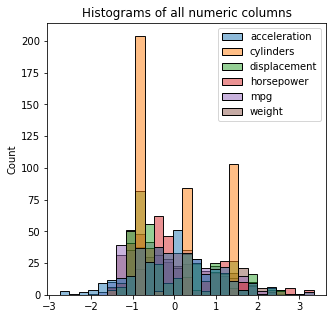

In [24]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

data_scaled = (data[num_cols] - data[num_cols].mean())/data[num_cols].std()
plt.figure(figsize=(5,5))
sn.histplot(data_scaled)
plt.title('Histograms of all numeric columns')
plt.show()

### Multivariate density plots

If you want to overlay distributions instead of having them side-by-side, it is better to simplify them to density curves.

#### In pandas

In pandas, we can call plot.density() directly from the DataFrame. However, like before, the plot is bad without scaling

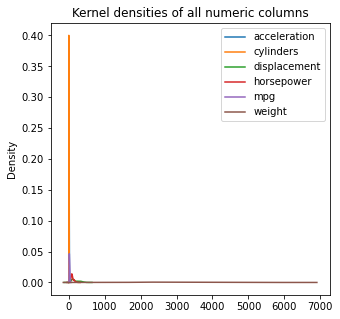

In [25]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

data[num_cols].plot.density(figsize=(5,5), title='Kernel densities of all numeric columns')
plt.show()

Scaling makes it better, however, still pretty chaotic due to the large number of columns

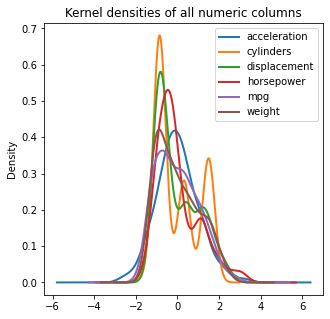

In [26]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

data_scaled = (data[num_cols] - data[num_cols].mean())/data[num_cols].std()
data_scaled.plot.density(linewidth=2, figsize=(5,5), title='Kernel densities of all numeric columns')
plt.show()

#### In seaborn

We can do similarly in seaborn using kdeplot(). Again, remember to scale your data

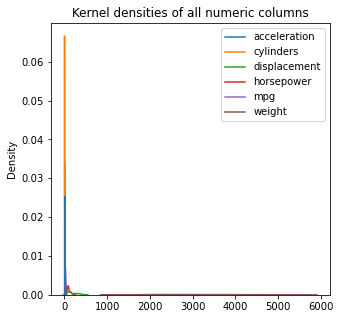

In [27]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

plt.figure(figsize=(5,5))
sn.kdeplot(data[num_cols])
plt.title('Kernel densities of all numeric columns')
plt.show()

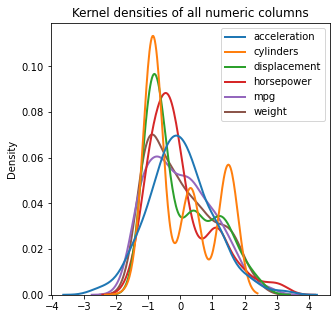

In [28]:
num_cols = ['acceleration', 'cylinders', 'displacement','horsepower','mpg','weight']

data_scaled = (data[num_cols] - data[num_cols].mean())/data[num_cols].std()
plt.figure(figsize=(5,5))
sn.kdeplot(data_scaled, linewidth=2)
plt.title('Kernel densities of all numeric columns')
plt.show()